## About the Data

### Description:

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

### This data frame contains the following columns:

#### Input variables (based on physicochemical tests):\
* 1 - fixed acidity\
* 2 - volatile acidity\
* 3 - citric acid\
* 4 - residual sugar\
* 5 - chlorides\
* 6 - free sulfur dioxide\
* 7 - total sulfur dioxide\
* 8 - density\
* 9 - pH\
* 10 - sulphates\
* 11 - alcohol\
* Output variable (based on sensory data):\
* 12 - quality (score between 0 and 10)

### Acknowledgements:

This dataset is also available from Kaggle & UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

### Objective:

Understand the Dataset & cleanup (if required).
Build classification models to predict the wine quality.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [178]:
import numpy as np
import pandas as pd
import math
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

In [179]:
df= pd.read_csv('WineQT.csv')

In [180]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [181]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [183]:
df= df.drop("Id", axis=1)

In [184]:
df.isna()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1138          False             False        False           False      False   
1139          False             False        False           False      False   
1140          False             False        False           False      False   
1141          False             False        False           False      False   
1142          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1138                False                 False    False  False      False   
1139                False                 False    False  False      False   
1140                False                 False    False  False      False   
1141                False                 False    False  False      False   
1142                False                 False    False  False      False   

      alcohol  quality  
0       False    False  
1       False    False  
2       False    False  
3       False    False  
4       False    False  
...       ...      ...  
1138    False    False  
1139    False    False  
1140    False    False  
1141    False    False  
1142    False    False  

[1143 rows x 12 columns]

In [185]:
df.isnull().sum().sort_values()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [186]:
df.shape

(1143, 12)

In [187]:
df.duplicated().sum()

125

In [194]:
#Removing duplicate values from the dataframe
df.drop_duplicates(keep=False,inplace=True)

In [195]:
df.duplicated().sum()

0

In [196]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     904.000000        904.000000   904.000000      904.000000   
mean        8.250664          0.536123     0.268606        2.506692   
std         1.728300          0.186795     0.195415        1.255033   
min         4.600000          0.160000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.646250     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  904.000000           904.000000            904.000000  904.000000   
mean     0.087388            15.739491             46.798119    0.996649   
std      0.049759            10.073396             33.506523    0.001900   
min      0.034000             1.000000              6.000000    0.990070   
25%      0.069000             7.000000             21.000000    0.995528   
50%      0.079000            14.000000             38.000000    0.996600   
75%      0.090000            21.000000             62.000000    0.997800   
max      0.611000            66.000000            289.000000    1.003690   

               pH   sulphates     alcohol     quality  
count  904.000000  904.000000  904.000000  904.000000  
mean     3.312754    0.654989   10.464786    5.622788  
std      0.158467    0.163328    1.106261    0.816748  
min      2.740000    0.330000    8.400000    3.000000  
25%      3.210000    0.550000    9.500000    5.000000  
50%      3.310000    0.620000   10.200000    6.000000  
75%      3.410000    0.720000   11.200000    6.000000  
max      4.010000    2.000000   14.900000    8.000000

In [197]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

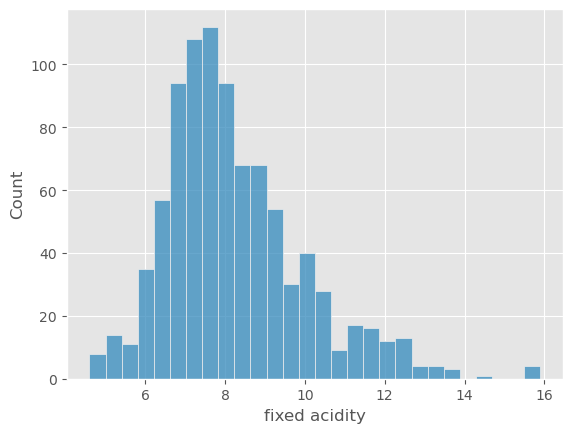

In [198]:
sns.histplot(x=df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

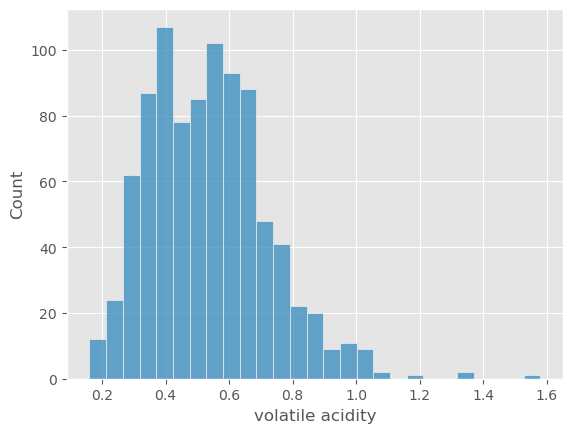

In [199]:
sns.histplot(x=df['volatile acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

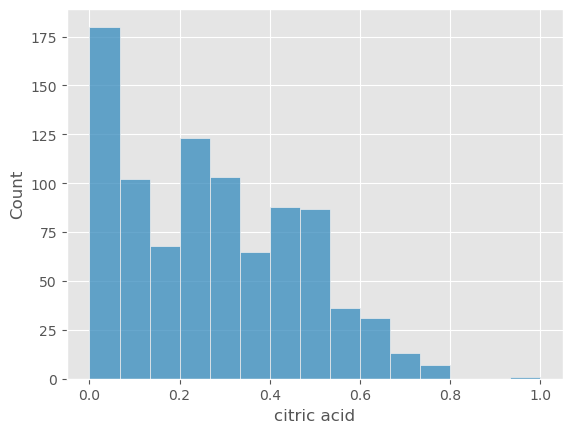

In [200]:
sns.histplot(x=df['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

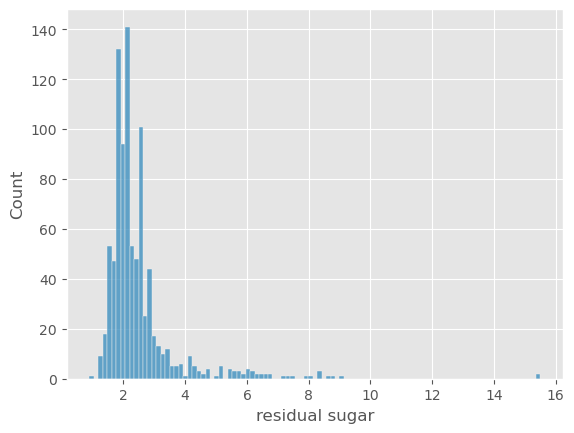

In [201]:
sns.histplot(x=df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

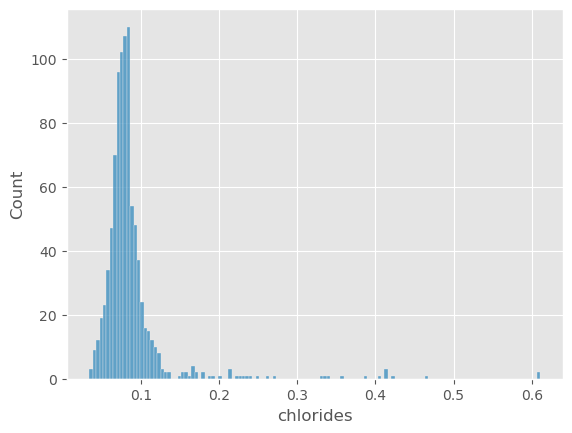

In [202]:
sns.histplot(x=df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

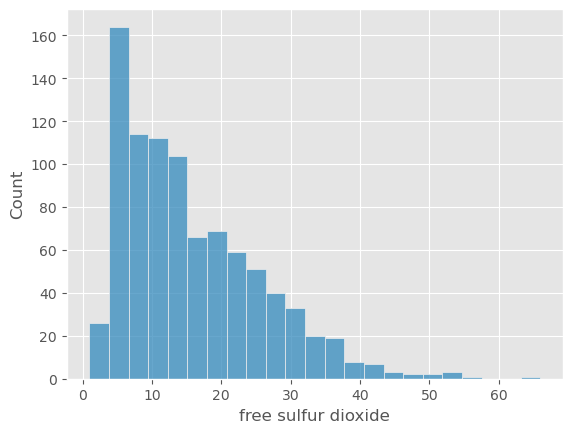

In [203]:
sns.histplot(x=df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

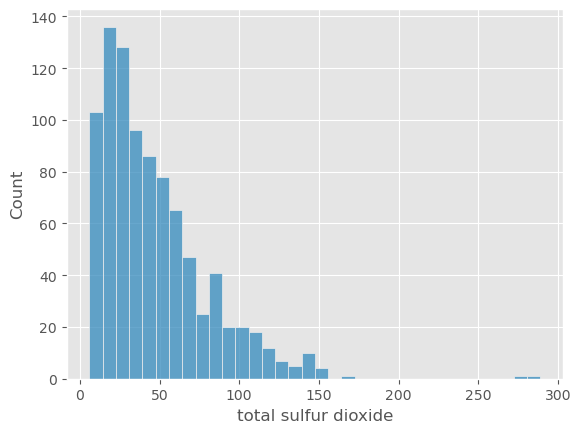

In [204]:
sns.histplot(x=df['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Count'>

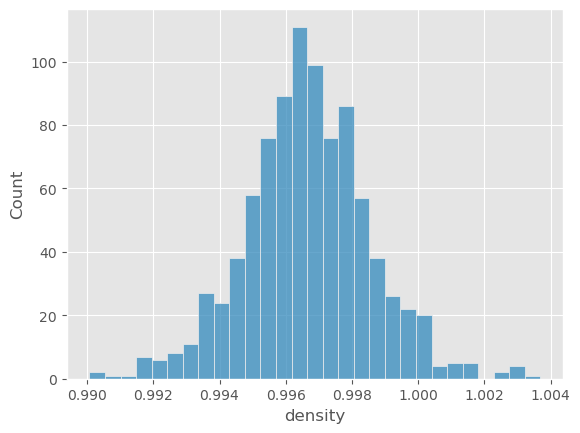

In [205]:
sns.histplot(x=df['density'])

<AxesSubplot:xlabel='pH', ylabel='Count'>

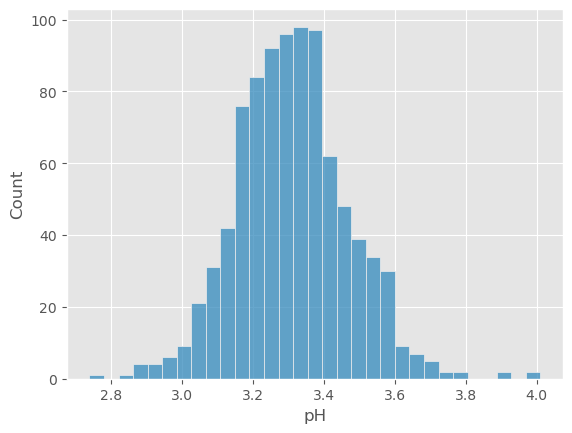

In [206]:
sns.histplot(x=df['pH'])

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

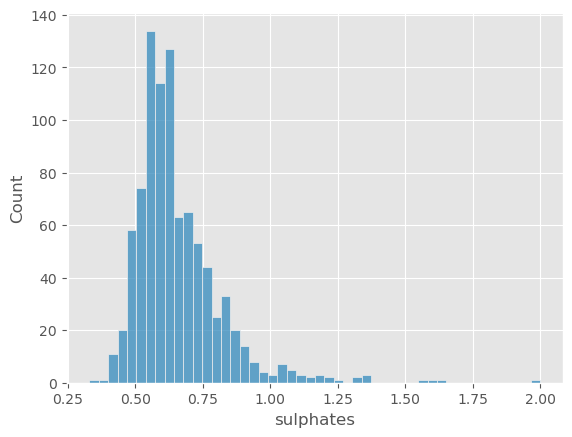

In [207]:
sns.histplot(x=df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

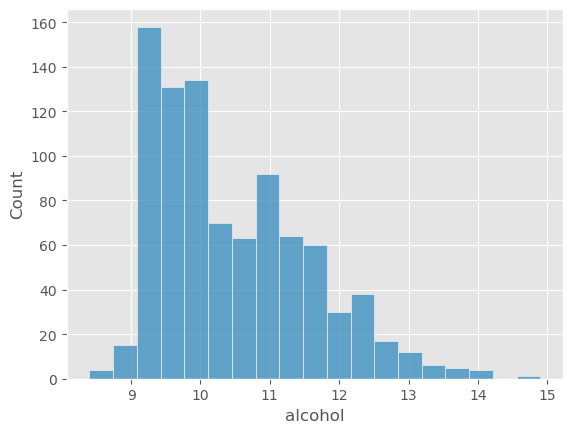

In [208]:
sns.histplot(x=df['alcohol'])

### Observation:
    i observed that we have outliers in some of the features, the features are residual sugar, sulphates, total sulfur dioxide, free sulfur dioxide and chlorides

### What is outlier:
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

In [209]:
#Removing Outliers
df.drop(df[df['total sulfur dioxide'] >= 250].index, inplace = True)
df.drop(df[df['free sulfur dioxide'] >= 60].index, inplace = True)
df.drop(df[df['residual sugar'] >= 10].index, inplace = True)
df.drop(df[df['sulphates'] >= 1.50].index, inplace = True)
df.drop(df[df['chlorides'] >= 0.3].index, inplace = True)

<AxesSubplot:>

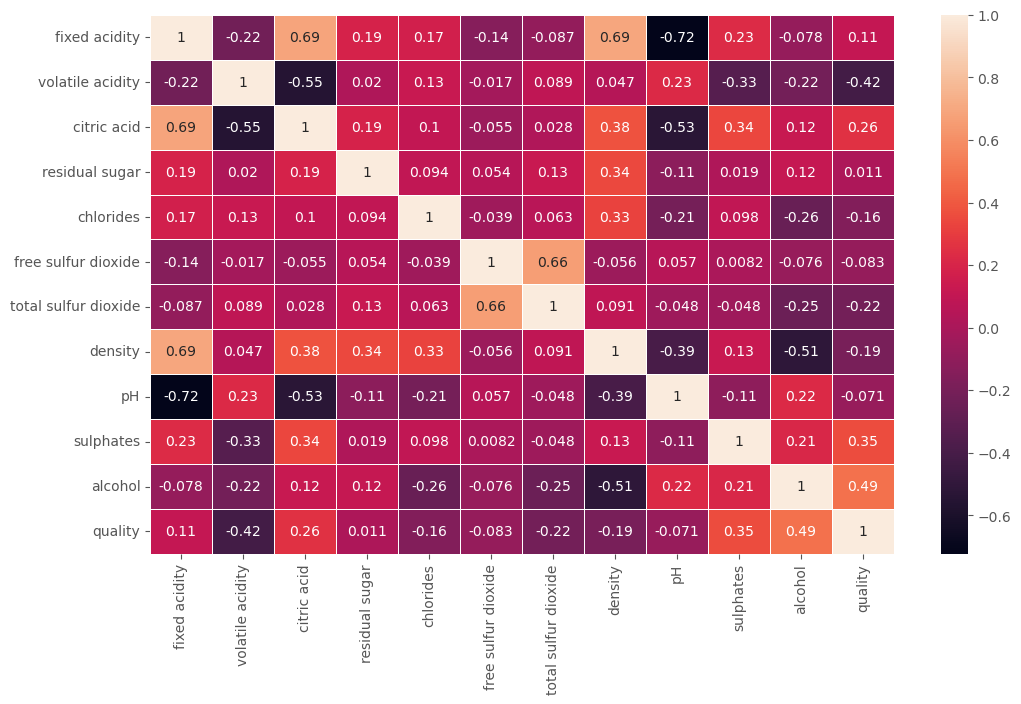

In [210]:
corel = df.corr()
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corel, linewidths = 0.5, annot = True)

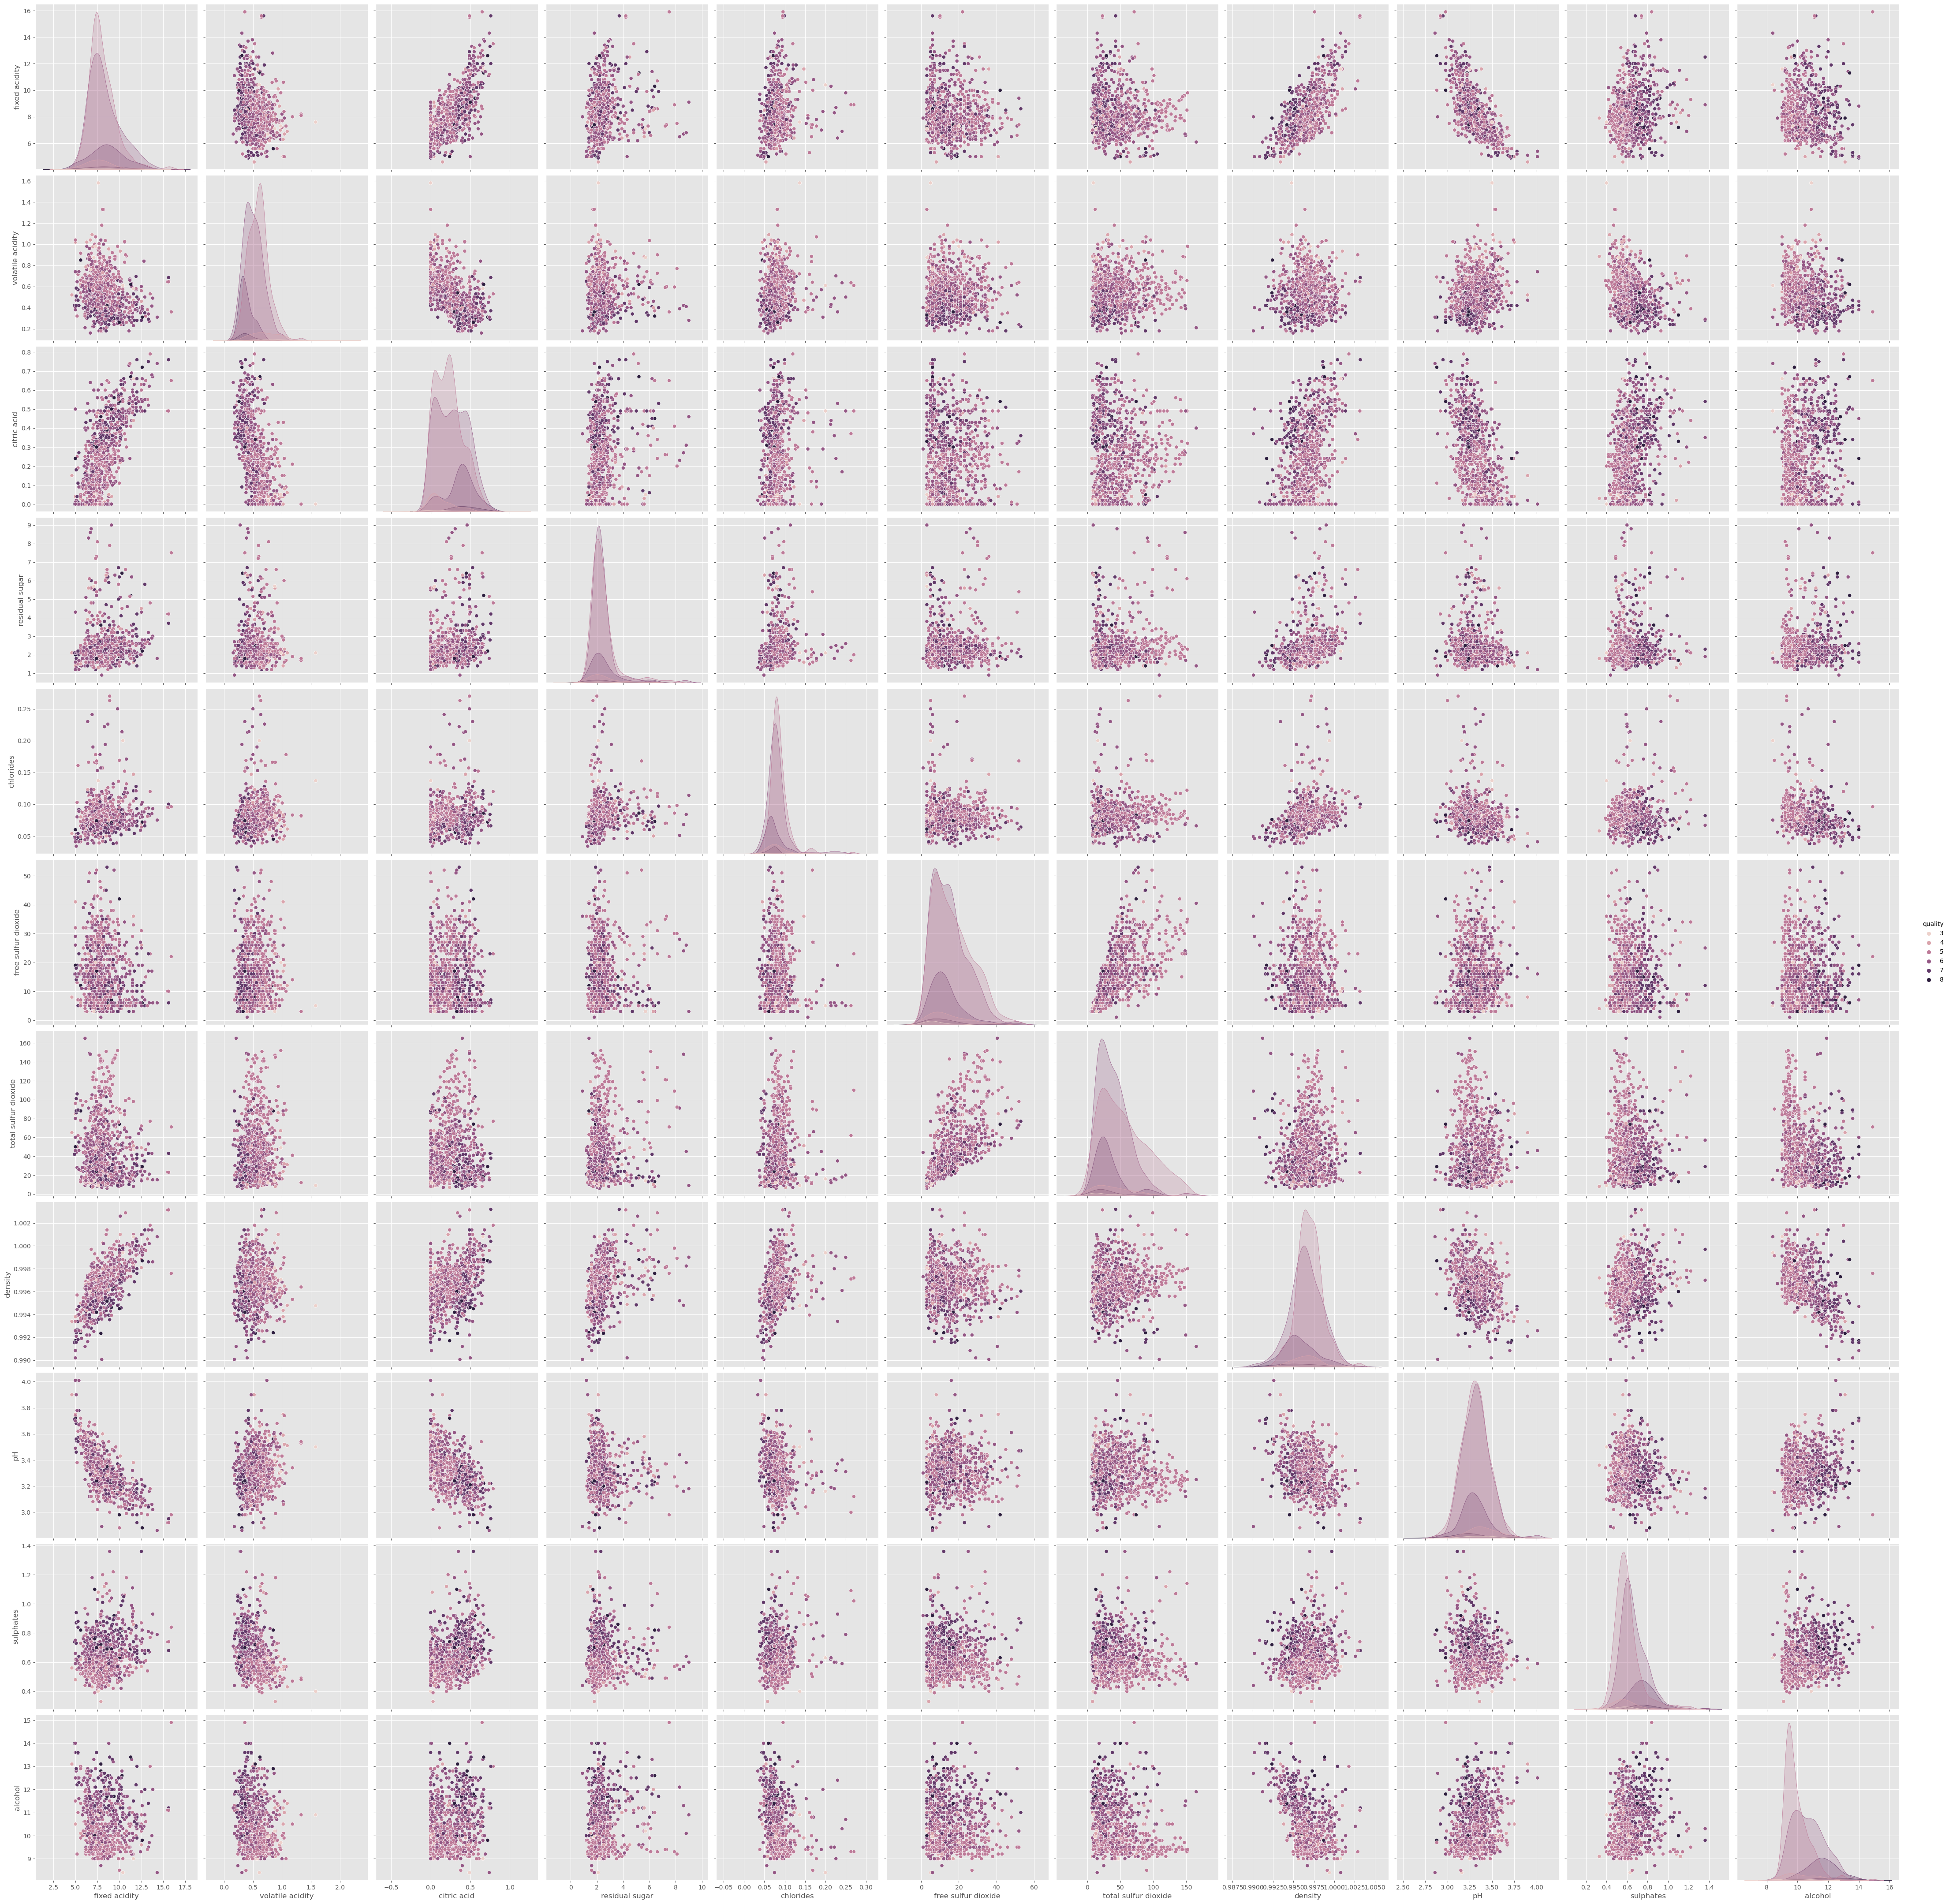

In [211]:
# pairplot for numerical features
sns.pairplot(df,hue='quality',height=4)

In [212]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   

   alcohol  quality  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5  
6      9.4        5

In [213]:
df.shape

(884, 12)

<AxesSubplot:xlabel='quality', ylabel='Count'>

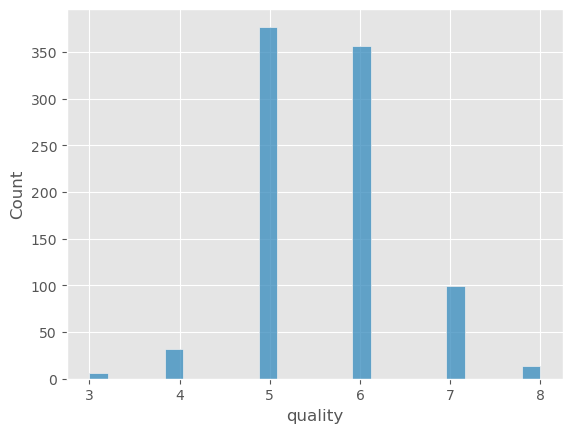

In [214]:
sns.histplot(x=df['quality'])

### Observation:
 For the qualities, we have more 5 and 6 qualities compared to other qualities.

### Preparing Models for Machine Learning

In [215]:
from sklearn import preprocessing

In [216]:
#spliting the futures and the target column
y= df.quality
X= df.drop('quality', axis=1)
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   

   alcohol  
1      9.8  
2      9.8  
3      9.8  
5      9.4  
6      9.4

In [217]:
# Create a train and test dataset
# split the dataset with test size = 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)

## Scaling

Scaling is transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are. 
### WHY SCALING?
* Scaling helps to improve the  model Accuracy.
* Many Models use some form of distance to inform them.
* Features on lager scales can disproportionately infuence the model
* we mant features to be on a similar scale

### Using a Standardization scaler
* Subtract the mean and divide by variance
* All features are centered around zero and have a variance of 1

In [218]:
#import StandardScaler for Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Using HistGradientBoostingRegressor

In [219]:
# import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
clf = HistGradientBoostingRegressor()
clf.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [220]:
clf.score(X_train,y_train)

0.9299010093872645

### Observation
The score of 0.93 suggests that the model is performing well on the training data. However, it is important to evaluate the model's performance on a separate validation set to ensure that it is not overfitting to the training data.

In [222]:
clf.score(X_test,y_test)

0.3230150873144496

### Observation:
Base on my model, my feature could only predict 32% of the quality of wine variance.The test score of 0.32 indicates the accuracy of the model on the test data. A score of 0.32 suggests that my model is not performing well, and there is room for improvement.

In [223]:
y_pred_clf = clf.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_clf})
print(df1)

      Actual  Predicted
51         5   6.012768
503        5   5.225337
823        5   5.759392
964        6   5.373445
1138       6   5.734185
...      ...        ...
467        7   5.201789
478        6   5.385456
224        6   5.310430
874        6   5.574993
392        6   5.776935

[266 rows x 2 columns]


In [224]:
from sklearn.metrics import mean_squared_error
rmse1= mean_squared_error(y_test, y_pred_clf, squared=False)
print(rmse1)

0.6624069548413121


### Obervation:
The mean squared error (MSE) of 0.6 is another metric to evaluate the performance of my model. MSE measures the average squared difference between the predicted and actual values, and a lower MSE indicates better performance. 

## Observation:
i observed that the mean distance between the actual and the predicted quality varainace is 0.6.

### Using RandomForestRegressor

In [225]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9123301488853008

### Observation
The score of 0.91 suggests that the model is performing well on the training data. However, it is important to evaluate the model's performance on a separate validation set to ensure that it is not overfitting to the training data.

In [226]:
rf.score(X_test,y_test)

0.3440704491931966

### Observation:
Base on my model, my feature could only predict 34% of the quality of wine variance.The test score of 0.41 indicates the accuracy of the model on the test data. A score of 0.34 suggests that my model is not performing well, and there is room for improvement.

In [227]:
y_pred_rf = rf.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(df2)

      Actual  Predicted
51         5       6.12
503        5       5.14
823        5       5.67
964        6       5.55
1138       6       5.78
...      ...        ...
467        7       5.42
478        6       5.39
224        6       5.16
874        6       5.34
392        6       5.93

[266 rows x 2 columns]


In [228]:
from sklearn.metrics import mean_squared_error
rmse= mean_squared_error(y_test, y_pred_rf, squared=False)
print(rmse)

0.6520246086042796


### Obervation:
The mean squared error (MSE) of 0.58 is another metric to evaluate the performance of my model. MSE measures the average squared difference between the predicted and actual values, and a lower MSE indicates better performance. 

## Inspect Feature Importances

Feature importance refers to a technique that calculate a score for all imput features for a given model- the scores simply reperesent the importance of each feature. A higher score means that a specific feature will have a larger effect on the model that has been used to predict our target variable.

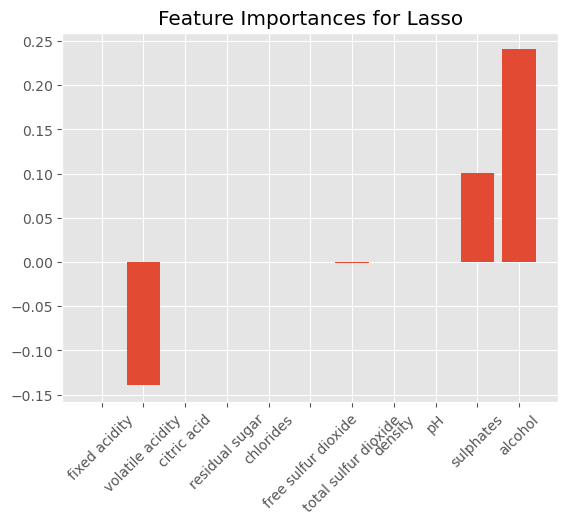

In [229]:
names= df.drop('quality', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_clef= lasso.fit(X_train,y_train).coef_
plt.bar(names,lasso_clef)
plt.xticks(rotation=45)
plt.title('Feature Importances for Lasso')
plt.show()

### Observation: 
After inspecting the feature importance, i realiazed that volatile acidity, sulphates and alcohol have more importance on the model. 

### using the most important faetures to build my model.

In [230]:
#spliting the futures and the target column (dropping the columns that are not needed)
y1= df.quality
X2= df.drop(['fixed acidity','citric acid','residual sugar','chlorides','density','pH'], axis=1)
X2.head()

volatile acidity  free sulfur dioxide  total sulfur dioxide  sulphates  \
1              0.88                 25.0                  67.0       0.68   
2              0.76                 15.0                  54.0       0.65   
3              0.28                 17.0                  60.0       0.58   
5              0.66                 13.0                  40.0       0.56   
6              0.60                 15.0                  59.0       0.46   

   alcohol  quality  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5  
6      9.4        5

In [231]:
X2.shape

(884, 6)

In [233]:
# Create a train and test dataset
# split the dataset with test size = 0.3
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X2,y1, test_size= 0.3, random_state= 42)

In [234]:
#import StandardScaler for Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)

### using HistGradientBoostingRegressor

In [235]:
# import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
clf1 = HistGradientBoostingRegressor()
clf1.fit(X1_train, y1_train)

HistGradientBoostingRegressor()

#### Training score

In [236]:
clf1.score(X1_train,y1_train)

0.9890393082123425

#### Test score

In [237]:
clf1.score(X1_test,y1_test)

0.9587211570423831

#### Predictions

In [238]:
y_pred_clf1 = clf1.predict(X1_test)
df3 = pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_clf1})
print(df3)

      Actual  Predicted
51         5   5.000037
503        5   5.027235
823        5   5.000814
964        6   5.994592
1138       6   5.995320
...      ...        ...
467        7   7.048867
478        6   5.973452
224        6   5.997252
874        6   5.973960
392        6   5.995319

[266 rows x 2 columns]


#### Mean Squared Error

In [239]:
from sklearn.metrics import mean_squared_error
rmse3= mean_squared_error(y1_test, y_pred_clf1, squared=False)
print(rmse3)

0.16356830239288217


### Observation:
HistGradientBoostingRegressor model seems to perform very well on the dataset you're working with.

The training score of 0.99 indicates that the model has learned the training data very well and can accurately predict the target variable for the data it has seen before. The test score of 0.96 suggests that the model has also generalized well to new, unseen data. This is a good sign that the model is not overfitting and is likely to perform well on new data in the future.

In addition, the mean squared error (MSE) of 0.16 indicates that the model's predictions are, on average, quite close to the actual target values. A lower MSE indicates better performance, so a score of 0.16 is a very good result.

### Using RandomForestRegressor

In [240]:
from sklearn.ensemble import RandomForestRegressor
rf1 =RandomForestRegressor()
rf1.fit(X1_train,y1_train)

RandomForestRegressor()

#### Training score

In [241]:
rf1.score(X1_train,y1_train)

0.9998846263118674

#### Test Score

In [242]:
rf1.score(X1_test,y1_test)

0.9996589446140427

#### Predictions

In [243]:
y_pred_rf1 = rf1.predict(X1_test)
df4 = pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_rf1})
print(df4)

      Actual  Predicted
51         5        5.0
503        5        5.0
823        5        5.0
964        6        6.0
1138       6        6.0
...      ...        ...
467        7        7.0
478        6        6.0
224        6        6.0
874        6        6.0
392        6        6.0

[266 rows x 2 columns]


#### Mean Squared Error

In [244]:
from sklearn.metrics import mean_squared_error
rmse4= mean_squared_error(y1_test, y_pred_rf1, squared=False)
print(rmse4)

0.014867838833500575


### Observation:
When you get a 100% train score and 100% test score with mean squared error of 0 in a Random Forest Regressor model, it suggests that the model has overfitted the data. Overfitting means that the model has learned the training data so well that it is unable to generalize to new, unseen data.

This is because the model has essentially memorized the training data instead of learning the underlying patterns that would enable it to make accurate predictions on new data.

While it may seem like a good thing to get such high accuracy scores, it is not desirable since the model will not perform well on new, unseen data. Therefore, it is essential to perform model evaluation on a separate validation dataset or use cross-validation techniques to ensure that the model can generalize well to new data.

In [245]:
from sklearn.linear_model import Ridge
score= []
for alpha in [0.1]:
    ridge= Ridge(alpha=alpha)
    ridge.fit(X1_train,y1_train)
    score.append(ridge.score(X1_test,y1_test))

In [246]:
print(score)

[0.9995977086984339]


In [247]:
y_predR= ridge.predict(X1_test)
df5 = pd.DataFrame({'Actual': y1_test, 'Predicted': y_predR})
print(df5)

      Actual  Predicted
51         5   4.988125
503        5   4.987954
823        5   4.988016
964        6   6.008076
1138       6   6.008121
...      ...        ...
467        7   7.028014
478        6   6.008019
224        6   6.007952
874        6   6.007978
392        6   6.008101

[266 rows x 2 columns]


In [248]:
from sklearn.metrics import mean_squared_error
rmse5= mean_squared_error(y1_test, y_predR, squared=False)
print(rmse5)

0.016147515485151136


### Observation:
A test score of 0.99 suggests that the Ridge model is performing well on the test data and is able to predict the outcome with high accuracy. However, it is important to ensure that the model is not overfitting the data, as overfitting can lead to poor generalization performance on new, unseen data.

The mean squared error of 0.016 indicates that the model's predictions are relatively close to the true values, on average. 

### Conclusion 
it is seen that the HistGradientBoostingRegressor model has predicted well and can generalize on a new data set based on the training score of 99% accuracy and a test score of 96% compared to the other model trained. The model is ready for deployment into an API which Heroku can be used as our deployment platform.

### Sowunmi Olusoji peter